# Initialization

Import necessary functions

In [1]:
Pkg.activate("..")
using ShallowWaterModels
#include("../src/dependencies.jl");
include("../src/models/WaterWaves.jl");
include("../src/models/PseudoSpectral.jl");

 Activating environment at `~/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/Project.toml`


Parameters of the problem

In [2]:
param = ( μ  = .1,      # shallow-water dimensionless parameter
            ϵ  = 1,     # nonlinearity dimensionless parameter
            N  = 2^12,  # number of collocation points
            L  = 10,    # size of the mesh (-L,L)
            T  = 5,     # final time of computation
            dt = 0.001, # timestep
            ns = 50,    # data stored every ns step
                );

Define initial data


In [3]:
z(x) = exp.(-abs.(x).^4); # surface deformation
v(x) = 0*exp.(-x.^2);     # zero velocity 
init = Init(z,v);

Set up initial-value problems for various models to compare

In [4]:
models=[]
push!(models,WaterWaves(param))
push!(models,PseudoSpectral(param;order=2,dealias=1,lowpass=1/100,verbose=false))
push!(models,PseudoSpectral(param;order=3,dealias=1,lowpass=1/100,verbose=false))
problems = []
for model in models
	push!(problems, Problem(model, init, param) )
end

┌ Warning: The fix point algorithm converged in 1 iterations
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/WaterWaves.jl:99
┌ Info: 
│ Builds the initial-value problem for model water waves
│ with parameters
│ (μ = 0.1, ϵ = 1, N = 4096, L = 10, T = 5, dt = 0.001, ns = 50)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:46
┌ Warning: The fix point algorithm converged in 198 iterations
└ @ Main /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/models/WaterWaves.jl:99
┌ Info: 
│ Builds the initial-value problem for model WW2
│ with parameters
│ (μ = 0.1, ϵ = 1, N = 4096, L = 10, T = 5, dt = 0.001, ns = 50)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:46
┌ Info: 
│ Builds the initial-value problem for model WW3
│ with parameters
│ (μ = 0.1, ϵ = 1, N = 4096, L = 10, T = 5, dt = 0.001, ns = 50)
└ @ ShallowWa

# Computation

Solve integration in time

In [5]:
for problem in problems
    solve!( problem )
end

┌ Info: 
│ Now solving the initial-value problem for model water waves
│ with parameters
│ (μ = 0.1, ϵ = 1, N = 4096, L = 10, T = 5, dt = 0.001, ns = 50)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:83
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


┌ Info: 
│ Now solving the initial-value problem for model WW2
│ with parameters
│ (μ = 0.1, ϵ = 1, N = 4096, L = 10, T = 5, dt = 0.001, ns = 50)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:83
Progress: 100%|█████████████████████████████████████████| Time: 0:01:08


┌ Info: 
│ Now solving the initial-value problem for model WW3
│ with parameters
│ (μ = 0.1, ϵ = 1, N = 4096, L = 10, T = 5, dt = 0.001, ns = 50)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:83
Progress: 100%|█████████████████████████████████████████| Time: 0:01:46


# Visualization

Plot solutions at final time


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


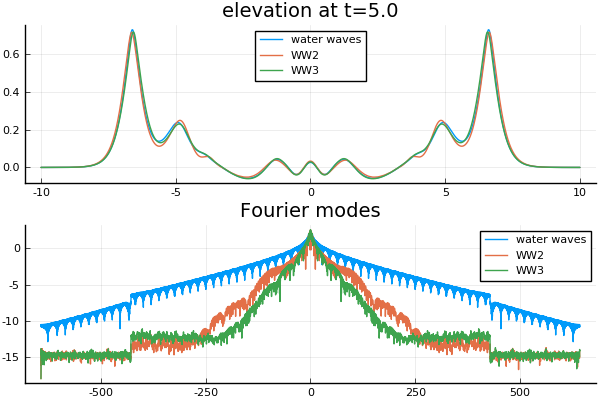

In [6]:
include("../src/Figures.jl");pyplot()
plot_solution(problems)

Generate animation

Creating animation: 100%|███████████████████████████████| Time: 0:00:55


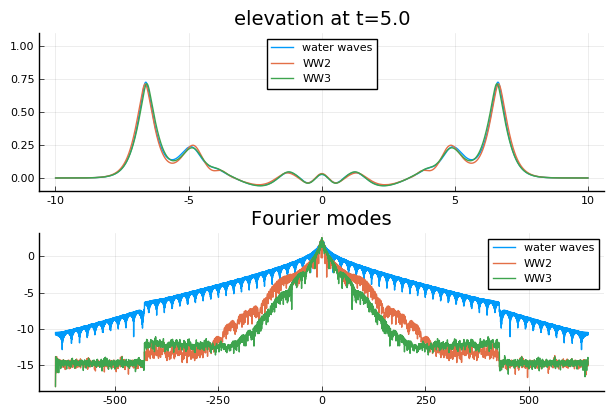

┌ Info: Saved animation to 
│   fn = /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/WWvsXX.gif
└ @ Plots /Users/vduchene/.julia/packages/Plots/l9il6/src/animation.jl:104


Plots.AnimatedGif("/Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/notebooks/WWvsXX.gif")
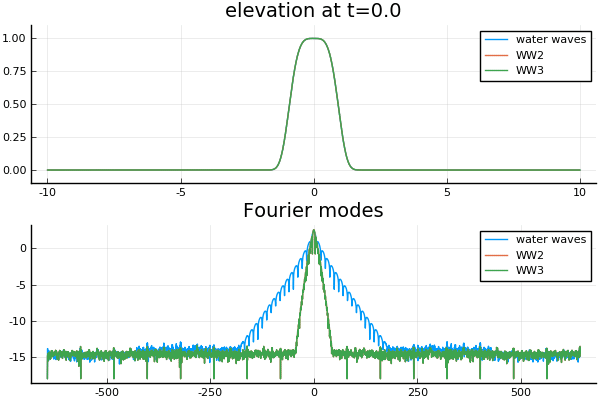

In [7]:
anim = create_animation(problems)
gif(anim, "WWvsXX.gif", fps=15)